In [26]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# Reading in the file
airports_df = pd.read_csv("airports.csv")
airports_df

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,NaN,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN
4,6526,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,NaN,US,US-AR,Newport,no,NaN,NaN,NaN,NaN,NaN,00AR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67307,46378,ZZ-0001,heliport,Sealand Helipad,51.894444,1.482500,40.0,EU,GB,GB-ENG,Sealand,no,NaN,NaN,NaN,http://www.sealandgov.org/,https://en.wikipedia.org/wiki/Principality_of_...,Roughs Tower Helipad
67308,307326,ZZ-0002,small_airport,Glorioso Islands Airstrip,-11.584278,47.296389,11.0,AF,TF,TF-U-A,Grande Glorieuse,no,NaN,NaN,NaN,NaN,NaN,NaN
67309,346788,ZZ-0003,small_airport,Fainting Goat Airport,32.110587,-97.356312,690.0,NaN,US,US-TX,Blum,no,87TX,NaN,87TX,NaN,NaN,NaN
67310,342102,ZZZW,closed,Scandium City Heliport,69.355287,-138.939310,4.0,NaN,CA,CA-YT,(Old) Scandium City,no,ZZZW,ZYW,YK96,NaN,NaN,NaN


In [28]:
# Accessing your columns
airports_df_cols = airports_df.columns.str.replace("_", " ")
airports_df_cols

Index(['id', 'ident', 'type', 'name', 'latitude deg', 'longitude deg',
       'elevation ft', 'continent', 'iso country', 'iso region',
       'municipality', 'scheduled service', 'gps code', 'iata code',
       'local code', 'home link', 'wikipedia link', 'keywords'],
      dtype='object')

In [29]:
# Setting the columns to this new variable
airports_df.columns = airports_df_cols

In [30]:
# Making a smaller dataframe from a larger dataframe
df2 = airports_df[['id', 'ident', 'type', 'name', 'latitude deg', 'longitude deg', 'elevation ft', 'municipality', 
                  'scheduled service', 'local code']]
df2

,id,ident,type,name,latitude deg,longitude deg,elevation ft,municipality,scheduled service,local code
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,Bensalem,no,00A
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,Leoti,no,00AA
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,Anchor Point,no,00AK
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,Harvest,no,00AL
4,6526,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,Newport,no,NaN
...,...,...,...,...,...,...,...,...,...,...
67307,46378,ZZ-0001,heliport,Sealand Helipad,51.894444,1.482500,40.0,Sealand,no,NaN
67308,307326,ZZ-0002,small_airport,Glorioso Islands Airstrip,-11.584278,47.296389,11.0,Grande Glorieuse,no,NaN
67309,346788,ZZ-0003,small_airport,Fainting Goat Airport,32.110587,-97.356312,690.0,Blum,no,87TX
67310,342102,ZZZW,closed,Scandium City Heliport,69.355287,-138.939310,4.0,(Old) Scandium City,no,YK96


In [31]:
# Crosstab
byregion = pd.crosstab(airports_df["iso country"], airports_df["iso region"])
byregion

iso region,AD-04,AD-08,AE-AJ,AE-AZ,AE-DU,AE-FU,AE-RK,AE-SH,AE-UQ,AF-BAL,...,ZW-MA,ZW-MC,ZW-ME,ZW-MI,ZW-MN,ZW-MS,ZW-MV,ZW-MW,ZW-U-A,ZZ-U-A
iso country,,,,,,,,,,,,,,,,,,,,,
AD,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AE,0,0,3,63,15,2,5,24,4,0,...,0,0,0,0,0,0,0,0,0,0
AF,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
AG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZM,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Summary Statistics
df2.describe()

,id,latitude deg,longitude deg,elevation ft
count,67312.000000,67312.000000,67312.000000,54335.000000
mean,130355.261944,25.945866,-31.136863,1268.620006
std,147216.979862,26.380436,84.227690,1624.730666
min,2.000000,-90.000000,-179.876999,-1266.000000
25%,16962.750000,11.195161,-93.801077,208.000000
50%,36279.500000,35.437555,-70.799722,725.000000
75%,322275.250000,43.035376,18.963488,1558.000000
max,347611.000000,82.750000,179.975700,22000.000000


In [33]:
# Using np.asarray
latitudes = df2['latitude deg'].head(100)
arr = np.asarray(latitudes)
arr[0]

40.07080078125

In [34]:
def bubble_sort(arr):
    for i in range(len(arr)):
        for j in range(len(arr) - 1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]

In [35]:
bubble_sort(arr)
arr[0]

19.832715

<AxesSubplot:>

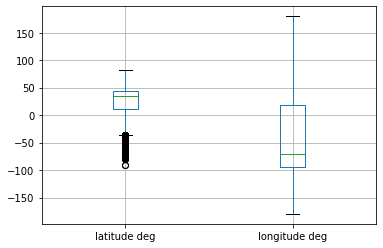

In [36]:
# Making a boxplot with the original df
airports_df.boxplot(column=["latitude deg", "longitude deg"])

In [37]:
# Checking Data Types
airports_df.dtypes

id                     int64
ident                 object
type                  object
name                  object
latitude deg         float64
longitude deg        float64
elevation ft         float64
continent             object
iso country           object
iso region            object
municipality          object
scheduled service     object
gps code              object
iata code             object
local code            object
home link             object
wikipedia link        object
keywords              object
dtype: object

In [38]:
df2.loc[df2.name.str.contains("Airport")]

,id,ident,type,name,latitude deg,longitude deg,elevation ft,municipality,scheduled service,local code
1,323361,00AA,small_airport,Aero B Ranch Airport,27.230900,-101.473911,3435.0,Leoti,no,00AA
5,322127,00AS,small_airport,Fulton Airport,28.781900,-97.818019,1100.0,Alex,no,00AS
6,6527,00AZ,small_airport,Cordes Airport,28.846600,-112.165001,3810.0,Cordes,no,00AZ
7,6528,00CA,small_airport,Goldstone (GTS) Airport,29.737700,-116.885329,3038.0,Barstow,no,00CA
8,324424,00CL,small_airport,Williams Ag Airport,30.136299,-121.763427,87.0,Biggs,no,00CL
...,...,...,...,...,...,...,...,...,...,...
67304,27244,ZYYJ,medium_airport,Yanji Chaoyangchuan Airport,42.882801,129.451004,624.0,Yanji,yes,NaN
67305,317861,ZYYK,medium_airport,Yingkou Lanqi Airport,40.542524,122.358600,NaN,"Laobian, Yingkou",yes,NaN
67306,32753,ZYYY,medium_airport,Shenyang Dongta Airport,41.784401,123.496002,NaN,"Dadong, Shenyang",no,NaN
67309,346788,ZZ-0003,small_airport,Fainting Goat Airport,32.110587,-97.356312,690.0,Blum,no,87TX


In [39]:
df2.loc[df2['scheduled service'].str.contains("yes")]

,id,ident,type,name,latitude deg,longitude deg,elevation ft,municipality,scheduled service,local code
228,4650,03N,small_airport,Utirik Airport,11.222000,169.852005,4.0,Utirik Island,yes,03N
243,6738,03PN,heliport,M.P. Metals Heliport,41.066861,-76.180806,479.0,Berwick,yes,03PN
313,6799,04VA,heliport,Russell County Medical Center Heliport,36.898000,-82.078000,2004.0,Lebanon,yes,04VA
323,6807,05AK,small_airport,Wasilla Creek Airpark,61.668301,-149.188004,620.0,Palmer,yes,05AK
618,7063,0AK,small_airport,Pilot Station Airport,61.934601,-162.899994,305.0,Pilot Station,yes,0AK
...,...,...,...,...,...,...,...,...,...,...
67300,27242,ZYTL,large_airport,Dalian Zhoushuizi International Airport,38.965698,121.539001,107.0,"Ganjingzi, Dalian",yes,NaN
67301,307013,ZYTN,medium_airport,Tonghua Sanyuanpu Airport,42.253889,125.703333,1200.0,Tonghua,yes,NaN
67302,27243,ZYTX,large_airport,Shenyang Taoxian International Airport,41.639801,123.483002,198.0,"Hunnan, Shenyang",yes,NaN
67304,27244,ZYYJ,medium_airport,Yanji Chaoyangchuan Airport,42.882801,129.451004,624.0,Yanji,yes,NaN


In [40]:
# Return 1 row of the dataframe with a specified name
df2.loc[df2["name"] == 'Newark Liberty International Airport']

,id,ident,type,name,latitude deg,longitude deg,elevation ft,municipality,scheduled service,local code
32798,3521,KEWR,large_airport,Newark Liberty International Airport,40.692501,-74.168701,18.0,New York,yes,EWR
